# Week 2

## Part 2: Exercises using the NetworkX library

### Book exercises
#### 2.1

Figures a, c, and d can all be drawn without raising the pencil. This is because they satisfy Eulers observation that for such a path to exist; there must be at most two nodes with an odd degree. This is the case because such a node must serve as a start or a stop node.

#### 2.3

In [76]:
import networkx as nx
import numpy as np
# import matplotlib.pyplot as plt

In [2]:
UG = nx.Graph()
UG.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)])
UG.add_node(5)

DG = nx.DiGraph()
DG.add_edges_from([(1,2), (2,3), (2,4), (3,1), (3,2), (4,1), (6,1), (6,3)])
DG.add_node(5)

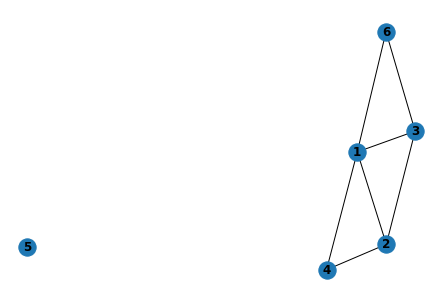

In [3]:
nx.draw(UG, with_labels=True, font_weight='bold')

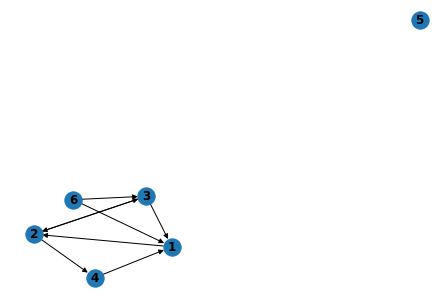

In [4]:
nx.draw(DG, with_labels=True, font_weight='bold')

Adjacency matrix for the respective graphs can be obtained with the following:

In [24]:
A_UG = nx.adjacency_matrix(UG)
A_DG = nx.adjacency_matrix(DG)

print(A_UG.todense(), "\n\n", A_DG.todense())

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]] 

 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


Link list for the graphs:

In [16]:
print(UG.edges(), "\n\n", DG.edges())

[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)] 

 [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]


Average Clustering Coef:

In [17]:
nx.average_clustering(UG)

0.6388888888888888

Switching labels on nodes 5 and 6: Adjacency matrix didn't change? (Labels not relevant?) For the link list the labels for node 5 are now present while 6 is not.

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]


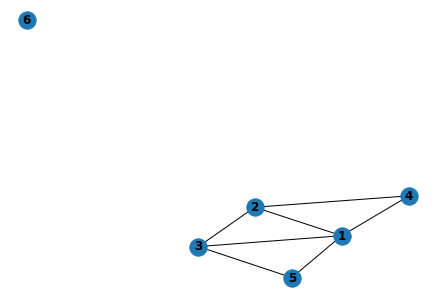

In [23]:
UG2 = nx.Graph()
UG2.add_edges_from([(1, 2), (1, 3), (1,4), (1,5), (2,3), (2,4), (3,5)])
UG2.add_node(6)

nx.draw(UG2, with_labels=True, font_weight='bold')
A_UG2 = nx.adjacency_matrix(UG2)

print(A_UG2.todense())
print(UG2.edges())

**What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?**

You cannot infer that there the graph is consisting of two disconnected components from the link list, while this can be inferred from the matrix

Number of paths of length three from node 1 to node 3:

In [38]:
def paths_of_length_n(graph, n, source, target):
  for path in nx.all_simple_paths(graph, source=source, target=target):
    if len(path) == n+1:
      yield path

paths_ug = [ x for x in paths_of_length_n(UG, 3, 1, 3)]
paths_dg = [ x for x in paths_of_length_n(DG, 3, 1, 3)]
print(len(paths_ug), len(paths_dg))

1 0


Number of cycles in UG and DG respectively

In [45]:
print(len(nx.cycle_basis(UG)), len([x for x in nx.simple_cycles(DG)]))

3 3


#### 2.5 Bipartite graphs

In [46]:
from networkx.algorithms import bipartite

In [48]:
B = nx.Graph()
edge_list = [(1,7), (2,9), (3,7), (3,8), (3,9), (4,9), (4,10), (5,9), (5,11), (6,11)]
purple, green = [1,2,3,4,5,6], [7,8,9,10,11]
B.add_nodes_from(purple, bipartite=0)
B.add_nodes_from(green, bipartite=1)
B.add_edges_from(edge_list)

In [51]:
A = nx.adjacency_matrix(B).todense()
A

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

The adjacency matrix is block anti-diagonal because links only exist between the two disjoint sets, not within them.

In [59]:
proj_purple = bipartite.projected_graph(B, purple)
proj_green = bipartite.projected_graph(B, green)

In [63]:
print(nx.adjacency_matrix(proj_purple).todense())
print(nx.adjacency_matrix(proj_green).todense())

[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [75]:
print("purple <k>", np.mean(list(dict(B.degree(purple)).values())))
print("green <k>", np.mean(list(dict(B.degree(green)).values())))

print("Purple projection <k>:", np.mean(list(dict(proj_purple.degree()).values())))
print("Green projection <k>:", np.mean(list(dict(proj_green.degree()).values())))

purple <k> 1.6666666666666667
green <k> 2.0
Purple projection <k>: 2.6666666666666665
Green projection <k>: 2.0


It is not surprising that they are different because the projection creates links between nodes only when they are both connected to the same node of the other set of nodes. A consequence of this is that there will be a loss of degree for any nodes that have a link to a node in the other set where no other nodes do. Additionally, nodes in the projection can gain degree in the fact that many nodes could be connected to the same node in the other set.

## Part 3: Plotting Degree Distributions

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


### Binning real numbers 

**Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with μ=2 and σ=0.125.**

In [79]:
mu, sigma = 2, 0.125 # mean and standard deviation
n = 10
s = np.random.normal(mu, sigma, 5000)

**Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

In [83]:
hist, bins = np.histogram(s, bins=n)
print(hist)
print(bins)

[   7   67  299  812 1269 1299  825  307  103   12]
[1.55337159 1.64213481 1.73089803 1.81966125 1.90842447 1.99718769
 2.08595091 2.17471413 2.26347735 2.35224057 2.44100379]


np.histogram returns two arrays; one containing histogram values and the other containing the bin edges. The edges array will have length len(hist) + 1 because the bin edges are the limits of each bin. There will always be an extra "closing bin edge"

**Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

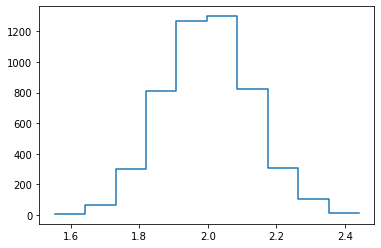

In [95]:
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps')

(array([   7.,   67.,  299.,  812., 1269., 1299.,  825.,  307.,  103.,
          12.]),
 array([1.55337159, 1.64213481, 1.73089803, 1.81966125, 1.90842447,
        1.99718769, 2.08595091, 2.17471413, 2.26347735, 2.35224057,
        2.44100379]),
 <BarContainer object of 10 artists>)

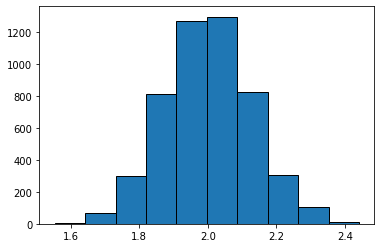

In [96]:
plt.hist(s, 10, edgecolor="black")

### Binning Integers

**But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by λ=10
. Find the maximum and minimum value of your 5000 random numbers.**

In [97]:
lam, N = 10, 5000
X = np.random.poisson(lam, N)
print("Min(X) =", min(X))
print("Max(X) =", max(X))

Min(X) = 1
Max(X) = 23


**Instead of simply specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector v
 that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's bin parameter as bin = v
. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

The sum of bin counts will equal N, the number of datapoints. The binning-vectors first element corresponds to the minimum value of the dataset, and the last corresponds to the maximum value.

In [104]:
v = np.arange(min(X), max(X))
hist, bins = np.histogram(X, bins=v)

Text(0.5, 1.0, 'Histogram of random integer distribution')

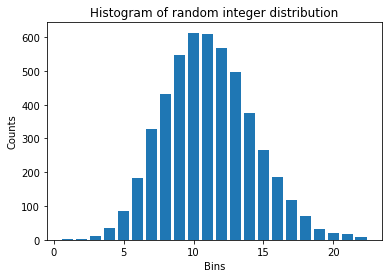

In [105]:
plt.bar(bins, np.insert(hist, 0, hist[0]))
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Histogram of random integer distribution')

### Binning and plotting degree distributions

**Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000
, but how do you find p
? Hint: The parameter λ
 in the Poisson distribution corresponds to the average degree, so you have to find a p
 that results in an average degree, k=10
. And you know that ⟨k⟩=p(N−1)
, which will give you p**

In [108]:
n = 5000
k = 10
# From the average degree formula we can get p
p = k / (n-1)
print("p =", p)

p = 0.002000400080016003


In [107]:
G = nx.erdos_renyi_graph(n, p)

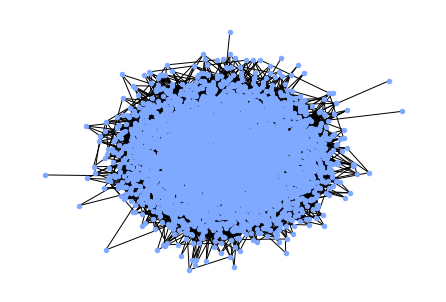

In [110]:
nx.draw_spring(G, node_size=20, node_color="#7fa8ff")

Text(0.5, 1.0, 'Erdös-Renyi degree distribution')

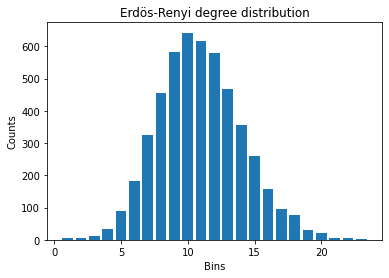

In [112]:
values_G = [ v for k,v in G.degree]
v = np.arange(min(values_G), max(values_G))
hist, bins = np.histogram(values_G, bins = v)
plt.bar(bins, np.insert(hist, 0, hist[0]))
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.title('Erdös-Renyi degree distribution')

## Part 4: Random Networks

**Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.**

In [113]:
N,p = 3000, 1e-3

In [114]:
L_e = p * N * (N - 1) / 2
print("<L> =", L_e)

<L> = 4498.5


In [115]:
print("Subcritical: ", p < 1/N)
print("Critical: ", p == 1/N)
print("Supercritical: ", p > 1/N)
print("Connected: ", p > np.log(N)/N)


Subcritical:  False
Critical:  False
Supercritical:  True
Connected:  False


The average degree of a random network is given by: 

\<k\> = p * (N-1)

For a network to be in the connected regime the following must hold:

\<k\> > ln(N)

From that we can formulate the inequality that provides us the number of nodes:

p > ln(N)/(N-1)

In [3]:
from itertools import count
import numpy as np
p = 10**(-3)

for N in count(start=2):
  if np.log(N)/(N-1) < p:
    N_cr = N
    break

print(f"The network enters the connected regime when it had {N_cr} nodes.")

The network enters the connected regime when it had 9120 nodes.


In [119]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.generators.random_graphs as rg

**Paths**

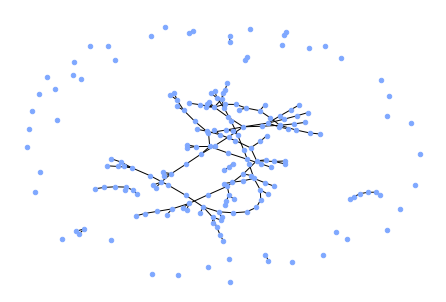

In [121]:
N, k_e  = 200, 1.5
p = k_e / (N - 1)

G = rg.erdos_renyi_graph(N, p)
nx.draw(G, node_size=20, node_color="#7fa8ff")

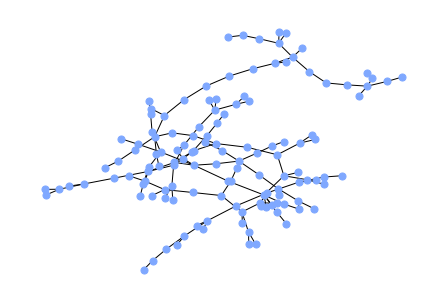

In [141]:
c = max(nx.connected_components(G), key=len)
Gc = G.subgraph(c).copy()

nx.draw(Gc, node_size=50, node_color="#7fa8ff")

In [153]:
import random
Gc_nodes = list(Gc.nodes)
start_node = random.choice(Gc_nodes)

In [154]:
nodes_up_to_two_steps_away = nx.single_source_shortest_path_length(G, start_node, 2)
nodes_2_steps = [node for node in nodes_up_to_two_steps_away if nodes_up_to_two_steps_away[node] == 2 ]
nodes_2_steps

[80, 85, 47]

In [157]:
color_map = []
for node in Gc:
    if node == start_node:
        color_map.append('#000000')
    elif node in nodes_2_steps:
        color_map.append('#ff0000')
    else: 
        color_map.append('#A0CBE2') 

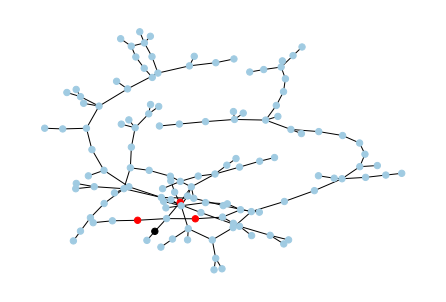

In [160]:
nx.draw(Gc, node_color=color_map, node_size=40, with_labels=False)